In this project, I analyze the behavior of the SPY using Python and basic financial indicators.
I use SPY data downloaded from Yahoo Finance (yfinance), covering the period starting from 01.01.2001.
We compute log returns, short-term and long-term moving averages (20-day and 200-day) and movements of stock.By combining future 10-day log returns. I generate a simple binary stress label that marks potential downside periods.
Finally, I visualize these signals on price charts and provide an interpretation of whether technical indicators align with stressful market conditions especially when momentum begins to show an upward trend.


 Financial markets often move through periods of stability and stress where volatility increases and downside risk becomes more significant.
In this project, our goal is to analyze the SPY using Python and examine whether simple technical indicators can help to us to understand such stress periods.
 We focus on SPY because it is the biggest stock in the world and it illustrates the movement of the U.S's stock market that is the largest financial market in the world.
To investigate potential stress behavior we rely on three commonly used and easy to compute indicators:short-term and long-term moving averages,log returns and a momentum of stock.
 These indicators are chosen because they are simple and basic level for calculating financial market's movements.
 Using these indicators together with a simple rule based on future 10 days, log returns that we generate a binary stress signal and explore how it behaves around major price movements.
 

In [5]:
import yfinance as yf

data= yf.download("SPY", start="2000-01-01") 
import numpy as np


data.head()

/var/folders/0b/khhdgc9x5f154bddztt3d3_40000gn/T/ipykernel_39698/3220748055.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data= yf.download("SPY", start="2000-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2000-01-03,91.887794,93.664739,90.900603,93.664739,8164300
2000-01-04,88.294380,91.019028,88.225277,90.683383,8089800
2000-01-05,88.452339,89.419787,86.714883,88.412852,12177900
2000-01-06,87.030823,89.400083,87.030823,88.215453,6227200
2000-01-07,92.085213,92.085213,88.491836,88.649787,8066500


In [6]:
prices = data["Close"]
prices.head()

Ticker,SPY
Date,
2000-01-03,91.887794
2000-01-04,88.294380
2000-01-05,88.452339
2000-01-06,87.030823
2000-01-07,92.085213


In [7]:
log_returns=np.log(prices/prices.shift(1))
log_returns.head()

Ticker,SPY
Date,
2000-01-03,NaN
2000-01-04,-0.039892
2000-01-05,0.001787
2000-01-06,-0.016202
2000-01-07,0.056452


In [8]:
future_return=log_returns.shift(-1)
future_return.head(12)


Ticker,SPY
Date,
2000-01-03,-0.039892
2000-01-04,0.001787
2000-01-05,-0.016202
2000-01-06,0.056452
2000-01-07,0.003424
2000-01-10,-0.012038
2000-01-11,-0.009998
2000-01-12,0.013452
2000-01-13,0.013487


In [9]:
future_10days=log_returns.rolling(10).sum().shift(-10)
future_10days.head(15)

Ticker,SPY
Date,
2000-01-03,0.002575
2000-01-04,0.050578
2000-01-05,0.033366
2000-01-06,0.047406
2000-01-07,-0.037798
2000-01-10,-0.029930
2000-01-11,-0.025850
2000-01-12,-0.019855
2000-01-13,-0.064998


In [10]:
future_10days.isna().sum()

Ticker
SPY    10
dtype: int64

In [11]:
stress_label=(future_10days < -0.05).astype(int)
stress_label.head(15)

Ticker,SPY
Date,
2000-01-03,0
2000-01-04,0
2000-01-05,0
2000-01-06,0
2000-01-07,0
2000-01-10,0
2000-01-11,0
2000-01-12,0
2000-01-13,1


In [12]:
short_average_term=prices.rolling(20).mean()
short_average_term.head(30)

Ticker,SPY
Date,
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,NaN
2000-01-10,NaN
2000-01-11,NaN
2000-01-12,NaN
2000-01-13,NaN


In [13]:
len(prices)

6513

In [14]:
long_average_term=prices.rolling(200).mean()
long_average_term.head(250)

Ticker,SPY
Date,
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,NaN
...,...
2000-12-20,91.318921
2000-12-21,91.279708
2000-12-22,91.255035


In [15]:
price_diff=prices.diff()
price_diff.head(10)

Ticker,SPY
Date,
2000-01-03,NaN
2000-01-04,-3.593414
2000-01-05,0.157959
2000-01-06,-1.421516
2000-01-07,5.054390
2000-01-10,0.315880
2000-01-11,-1.105659
2000-01-12,-0.908211
2000-01-13,1.224098


In [16]:
gain=price_diff.clip(lower=0)
loss=(-price_diff).clip(lower=0)
gain.head(10), loss.head(10)

(Ticker           SPY
 Date                
 2000-01-03       NaN
 2000-01-04  0.000000
 2000-01-05  0.157959
 2000-01-06  0.000000
 2000-01-07  5.054390
 2000-01-10  0.315880
 2000-01-11  0.000000
 2000-01-12  0.000000
 2000-01-13  1.224098
 2000-01-14  1.243904,
 Ticker           SPY
 Date                
 2000-01-03       NaN
 2000-01-04  3.593414
 2000-01-05  0.000000
 2000-01-06  1.421516
 2000-01-07  0.000000
 2000-01-10  0.000000
 2000-01-11  1.105659
 2000-01-12  0.908211
 2000-01-13  0.000000
 2000-01-14  0.000000)

In [17]:
avg_gain=gain.rolling(14).mean()
avg_loss=loss.rolling(14).mean()
avg_gain.head(20), avg_loss.head(20)

(Ticker           SPY
 Date                
 2000-01-03       NaN
 2000-01-04       NaN
 2000-01-05       NaN
 2000-01-06       NaN
 2000-01-07       NaN
 2000-01-10       NaN
 2000-01-11       NaN
 2000-01-12       NaN
 2000-01-13       NaN
 2000-01-14       NaN
 2000-01-18       NaN
 2000-01-19       NaN
 2000-01-20       NaN
 2000-01-21       NaN
 2000-01-24  0.624750
 2000-01-25  0.696674
 2000-01-26  0.685391
 2000-01-27  0.685391
 2000-01-28  0.324363
 2000-01-31  0.468215,
 Ticker           SPY
 Date                
 2000-01-03       NaN
 2000-01-04       NaN
 2000-01-05       NaN
 2000-01-06       NaN
 2000-01-07       NaN
 2000-01-10       NaN
 2000-01-11       NaN
 2000-01-12       NaN
 2000-01-13       NaN
 2000-01-14       NaN
 2000-01-18       NaN
 2000-01-19       NaN
 2000-01-20       NaN
 2000-01-21       NaN
 2000-01-24  0.854624
 2000-01-25  0.597952
 2000-01-26  0.648724
 2000-01-27  0.572572
 2000-01-28  0.770010
 2000-01-31  0.770010)

In [18]:
avg = avg_gain / avg_loss
motion_14 = 100 - (100 / (1 + avg))
motion_14.head(20)

Ticker,SPY
Date,
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,NaN
2000-01-10,NaN
2000-01-11,NaN
2000-01-12,NaN
2000-01-13,NaN


In [19]:
import pandas as pd

df = pd.DataFrame({
    "price": prices,
    "log_ret": log_returns,
    "future_10day": future_10days,
    "stress": stress_label,
    "short_average_ter": short_average_term,
    "long_average_ter": long_average_term,
    "motion_1": motion_14
})

df.head(10)

ValueError: If using all scalar values, you must pass an index

In [20]:
import pandas as pd

df = pd.DataFrame({
    "price": prices,
    "log_ret": log_returns,
    "future_10day": future_10days,
    "stress": stress_label,
    "short_average_ter": short_average_term,
    "long_average_ter": long_average_term,
    "motion_1": motion_14
})

df.head(10)



ValueError: If using all scalar values, you must pass an index

In [31]:
import pandas as pd

df = pd.concat(
    [
        prices,            
        log_returns,      
        future_10days,     
        stress_label,      
        short_average_term,
        long_average_term, 
        motion_14          
    ],
    axis=1
)

df.columns = [
    "price",
    "log_ret",
    "future_10days",
    "stress",
    "short_average_term",
    "long_average_term",
    "motion_14"
]

df.head(10)

,price,log_ret,future_10days,stress,short_average_term,long_average_term,motion_14
Date,,,,,,,
2000-01-03,91.887794,NaN,0.002575,0,NaN,NaN,NaN
2000-01-04,88.294380,-0.039892,0.050578,0,NaN,NaN,NaN
2000-01-05,88.452339,0.001787,0.033366,0,NaN,NaN,NaN
2000-01-06,87.030823,-0.016202,0.047406,0,NaN,NaN,NaN
2000-01-07,92.085213,0.056452,-0.037798,0,NaN,NaN,NaN
2000-01-10,92.401093,0.003424,-0.029930,0,NaN,NaN,NaN
2000-01-11,91.295433,-0.012038,-0.025850,0,NaN,NaN,NaN
2000-01-12,90.387222,-0.009998,-0.019855,0,NaN,NaN,NaN
2000-01-13,91.611320,0.013452,-0.064998,1,NaN,NaN,NaN


In [22]:
df_clean = df.dropna()
df_clean.head()
len(df_clean)

6304

In [23]:
X = df_clean[["log_ret", "short_average_term", "long_average_term", "motion_14", "price"]]
y = df_clean["stress"]

X.head(), y.head()

(             log_ret  short_average_term  long_average_term  motion_14  \
 Date                                                                     
 2000-10-16  0.004533           90.243496          91.726284  40.963768   
 2000-10-17 -0.025190           89.886462          91.695683  33.853390   
 2000-10-18 -0.003718           89.547826          91.681458  28.227844   
 2000-10-19  0.037016           89.440417          91.682555  42.400907   
 2000-10-20  0.004253           89.269358          91.692649  43.152177   
 
                 price  
 Date                   
 2000-10-16  87.955574  
 2000-10-17  85.767647  
 2000-10-18  85.449394  
 2000-10-19  88.671669  
 2000-10-20  89.049583  ,
 Date
 2000-10-16    0
 2000-10-17    0
 2000-10-18    0
 2000-10-19    0
 2000-10-20    0
 Name: stress, dtype: int64)

The price chart together wih the short term and long term moving averages show market’s overall trend.
 Periods where the short term moves below the long terms often coincide with downward trends or slower market momentum.
 These movements can indicate weaker market conditions and in several cases in our dataset they align with upcoming stress periods identified by our model.


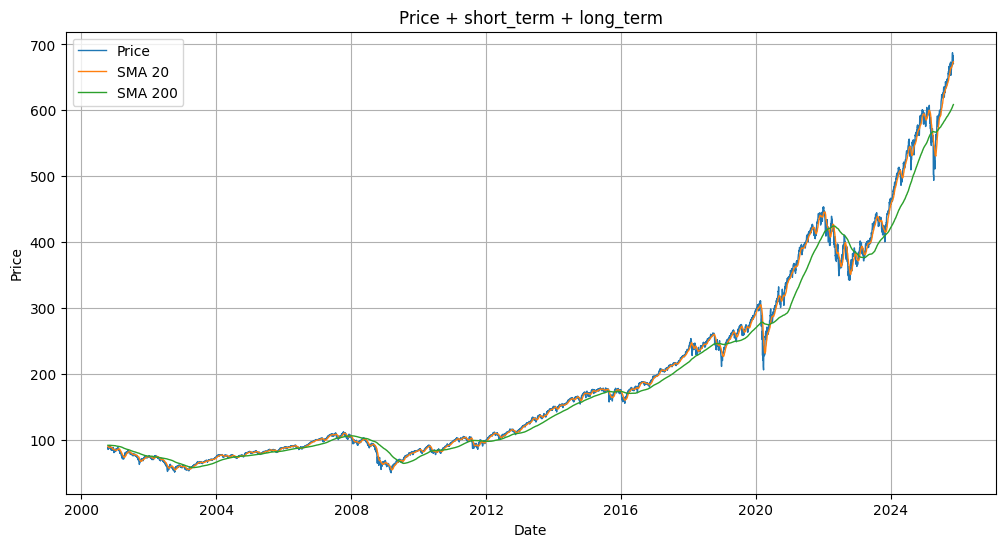

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(df_clean.index, df_clean["price"], label="Price", linewidth=1)
plt.plot(df_clean.index, df_clean["short_average_term"], label="SMA 20", linewidth=1)
plt.plot(df_clean.index, df_clean["long_average_term"], label="SMA 200", linewidth=1)

plt.title("Price + short_term + long_term")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()


The below graph is useful for identifying overbought (motion_14 > 70) and oversold (motion_14 < 30) conditions.
 Low motion_14 values often occur during corrections or when selling pressure is dominant.
 In many stress periods marked by our model motion values dip toward the oversold region before recovering.
This suggests that momentum loss can precede stress conditions.

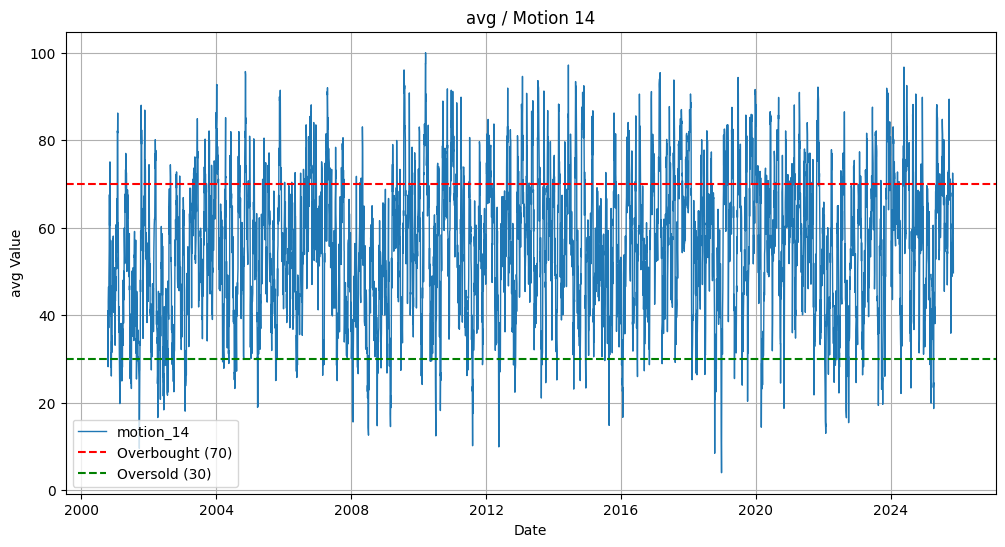

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(df_clean.index, df_clean["motion_14"], label="motion_14", linewidth=1)

plt.axhline(70, color="red", linestyle="--", label="Overbought (70)")
plt.axhline(30, color="green", linestyle="--", label="Oversold (30)")

plt.title("avg / Motion 14")
plt.xlabel("Date")
plt.ylabel("avg Value")
plt.legend()
plt.grid(True)

plt.show()

 The binary stress indicator marks days where the future return is below the chosen threshold.
 These stress signals tend to cluster around periods of declining prices and greater volatility.
 The timeline shows that stress rarely appears randomly that it often follows short-term negative momentum.

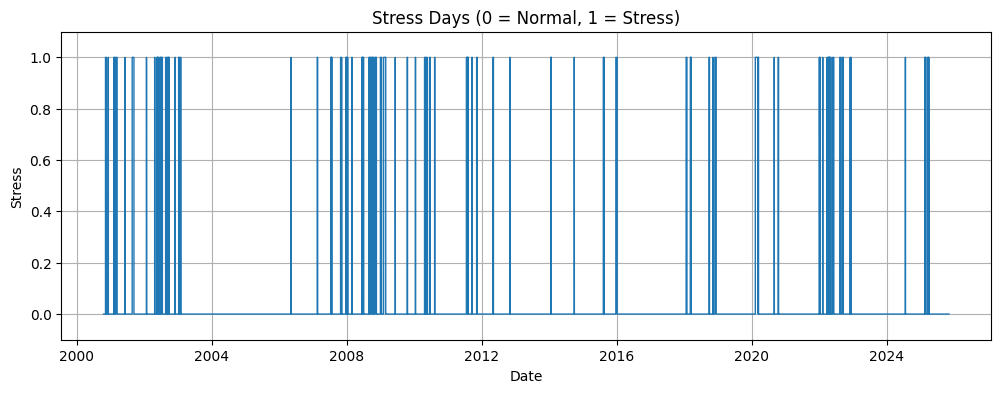

In [27]:
plt.figure(figsize=(12,4))

plt.step(df_clean.index, df_clean["stress"], where="post", linewidth=1)
plt.ylim(-0.1, 1.1)

plt.title("Stress Days (0 = Normal, 1 = Stress)")
plt.xlabel("Date")
plt.ylabel("Stress")
plt.grid(True)

plt.show()

 When stress days are overlaid on the price chart we observe that most stress points occur during downward price movements.This supports the idea that combining simple technical indicators with a future return rule can highlight potential weak market conditions.
 The stress marks visually confirm that the model captures several meaningful downside periods.

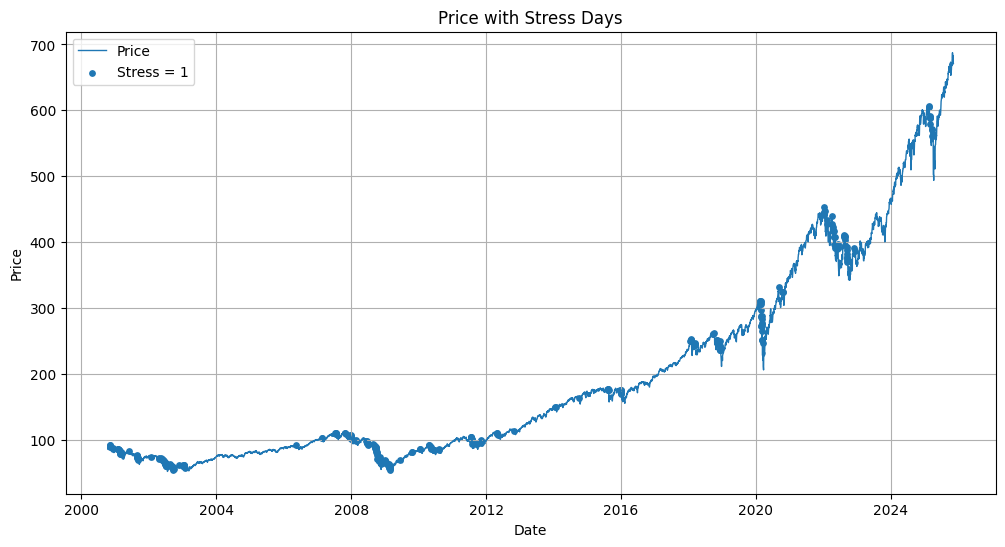

In [29]:
stress_days = df_clean[df_clean["stress"] == 1]

plt.figure(figsize=(12,6))

plt.plot(df_clean.index, df_clean["price"], label="Price", linewidth=1)

plt.scatter(stress_days.index, stress_days["price"], 
            label="Stress = 1", s=15)

plt.title("Price with Stress Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()

 In this project, I used Python and simple technical indicators to analyze the behavior of the SPY stock.
 Our results show that stress periods defined using future log returns often coincide with downward price trends and low momentum signals.
 The short term and long term moving averages helped identify general trend direction while the motions provided additional information about momentum weakness.
Overall, the stress signals we generated were meaningful because they aligned with market's movements.However, the model is relatively simple therefore it is not giving exact amount and it can improved by more signals.